In [529]:
%matplotlib inline
import os
import sys
import itertools

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

import rtmtools.lblrtm.visualisation as viz
import climatools.plot.plot

from IPython import display


import imp
del xr.DataArray.climaviz
imp.reload(climatools.plot.plot)

<module 'climatools.plot.plot' from '/nuwa_cluster/home/jackyu/climatools/climatools/plot/plot.py'>

In [519]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu', 
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'n2o',
                       'band07_wn_1215_1380',
                       'P_50_T_250',
                       '4.e-21')
                       
path_dgdgs = os.path.join(dir_run, 'dgdgs.dat')
path_absmean = os.path.join(dir_run, 'absmean.dat')
path_fluxg = os.path.join(dir_run, 'output_fluxg.dat')
path_coolrg = os.path.join(dir_run, 'output_coolrg.dat')
path_flux = os.path.join(dir_run, 'output_flux.dat')
path_coolr = os.path.join(dir_run, 'output_coolr.dat')
                       

In [3]:
dir_clirad = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                          'clirad/LW/examples',
                          '1_0912_mdc_Steve_CLIRAD_lw',
                          'g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          '4.e-21',
                          'dgs_g234_linearlogavg')

path_coolr_k1 = os.path.join(dir_clirad, 'b07_coolr_k1.txt')
path_coolr_k2 = os.path.join(dir_clirad, 'b07_coolr_k2.txt')
path_coolr_k3 = os.path.join(dir_clirad, 'b07_coolr_k3.txt')
path_coolr_k4 = os.path.join(dir_clirad, 'b07_coolr_k4.txt')

path_sfd_k1 = os.path.join(dir_clirad, 'b07_sfd_k1.txt')
path_sfd_k2 = os.path.join(dir_clirad, 'b07_sfd_k2.txt')
path_sfd_k3 = os.path.join(dir_clirad, 'b07_sfd_k3.txt')
path_sfd_k4 = os.path.join(dir_clirad, 'b07_sfd_k4.txt')

path_sfu_k1 = os.path.join(dir_clirad, 'b07_sfu_k1.txt')
path_sfu_k2 = os.path.join(dir_clirad, 'b07_sfu_k2.txt')
path_sfu_k3 = os.path.join(dir_clirad, 'b07_sfu_k3.txt')
path_sfu_k4 = os.path.join(dir_clirad, 'b07_sfu_k4.txt')

path_fnet_k1 = os.path.join(dir_clirad, 'b07_fnet_k1.txt')
path_fnet_k2 = os.path.join(dir_clirad, 'b07_fnet_k2.txt')
path_fnet_k3 = os.path.join(dir_clirad, 'b07_fnet_k3.txt')
path_fnet_k4 = os.path.join(dir_clirad, 'b07_fnet_k4.txt')

In [4]:
# load fluxg
df = pd.read_csv(path_fluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'].isel(g=0))
ds_fluxg = ds

In [5]:
# load coolrg
df = pd.read_csv(path_coolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['layer'] = ('pressure', ds['layer'].isel(g=0))
ds_coolrg = ds

In [6]:
# load flux
df = pd.read_csv(path_flux, sep=r'\s+')
df = df.set_index(['pressure'])
ds = xr.Dataset.from_dataframe(df)
ds_flux = ds.set_coords(['level'])

In [7]:
# load coolr
df = pd.read_csv(path_coolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_coolr = ds.set_coords(['layer'])

In [8]:
# load absmean
df = pd.read_csv(path_absmean, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_absmean = ds.set_coords(['layer'])

In [9]:
# load dgdgs
df = pd.read_csv(path_dgdgs, sep=r'\s+')
df = df.set_index(['g'])

ds_dgdgs = xr.Dataset.from_dataframe(df)

In [10]:
# load clirad's fluxg
paths_flug = [path_sfu_k1, path_sfu_k2, path_sfu_k3, path_sfu_k4]
paths_fldg = [path_sfd_k1, path_sfd_k2, path_sfd_k3, path_sfd_k4]
paths_fnetg = [path_fnet_k1, path_fnet_k2, path_fnet_k3, path_fnet_k4]

df_flug = pd.concat([pd.read_csv(path, header=None)
                     for path in paths_flug], axis=1)
df_fldg = pd.concat([pd.read_csv(path, header=None)
                     for path in paths_fldg], axis=1)
df_fnetg = pd.concat([pd.read_csv(path, header=None)
                      for path in paths_fnetg], axis=1)

ds = xr.Dataset()
ds.coords['pressure'] = ('pressure', ds_fluxg.coords['pressure'])
ds.coords['g'] = ('g', ds_fluxg.coords['g'])
ds.coords['level'] = ('pressure', range(1, ds_fluxg.dims['pressure'] + 1))
ds['flug'] = (('pressure', 'g'), df_flug)
ds['fldg'] = (('pressure', 'g'), df_fldg)
ds['fnetg'] = (('pressure', 'g'), df_fnetg)

ds_fluxg_clirad = ds

In [11]:
# load clirad's coolrg
paths_coolrg = [path_coolr_k1, 
                path_coolr_k2, 
                path_coolr_k3, 
                path_coolr_k4]

df_coolrg = pd.concat([pd.read_csv(path, header=None) 
                       for path in paths_coolrg], axis=1)
ds = xr.Dataset()
ds.coords['pressure'] = ('pressure', ds_coolrg.coords['pressure'])
ds.coords['g'] = ('g', ds_coolrg.coords['g'])
ds.coords['layer'] = ('pressure', 
                      range(1, ds_coolrg.dims['pressure'] + 1))
ds['coolrg'] = (('pressure', 'g'), df_coolrg)

ds_coolrg_clirad = ds

In [228]:
# using xarray accessors

In [506]:
###
names_var = ['flug', 'fnetg', 'coolrg']
colors = ['darkred', 'lightcoral', 'blue']

###
names_model = ['crd', 'clirad']

linestyles = ['-', '--']


### 
yscales = ['linear', 'log']

varlims_from_indexrange = [None, (1e-4, 5e1)]


###
vartypes = ['flux', 'cooling rate']
names_allowedvar = [['flug', 'fnetg'], ['coolrg']]


###
names_ds = list(itertools.product(vartypes, names_model))
dss = [ds_fluxg, ds_fluxg_clirad, ds_coolrg, ds_coolrg_clirad]


###
names_ax = list(itertools.product(vartypes,
                                  yscales))

##########################
dict_color = dict(zip(names_var, colors))
dict_linestyle = dict(zip(names_model, linestyles))
dict_varlim = dict(zip(yscales, varlims_from_indexrange))
dict_ds = dict(zip(names_ds, dss))
dict_names_allowedvar = dict(zip(vartypes, names_allowedvar))


-----  g-group 1  ---------------


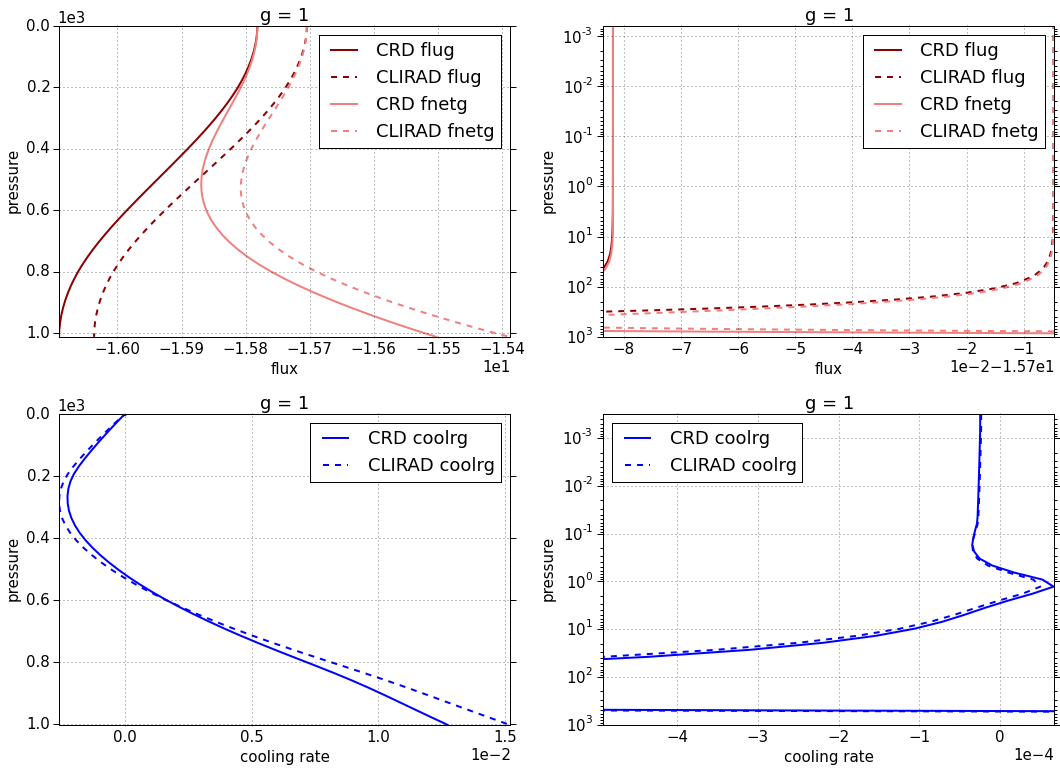


-----  g-group 2  ---------------


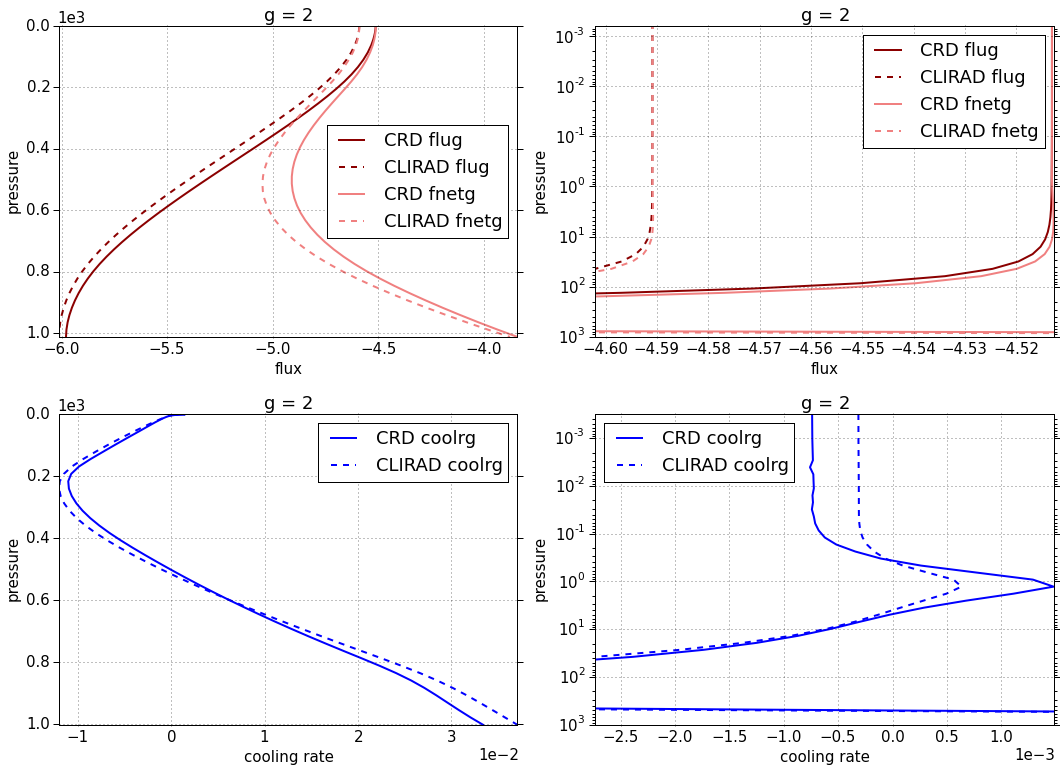


-----  g-group 3  ---------------


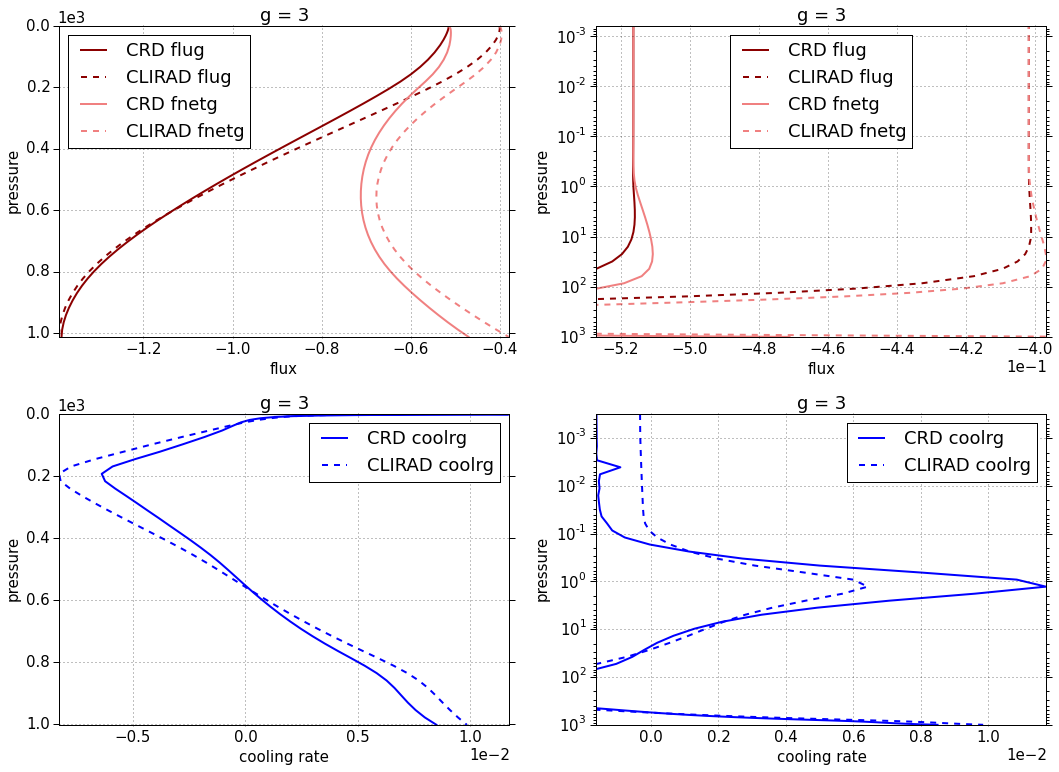


-----  g-group 4  ---------------


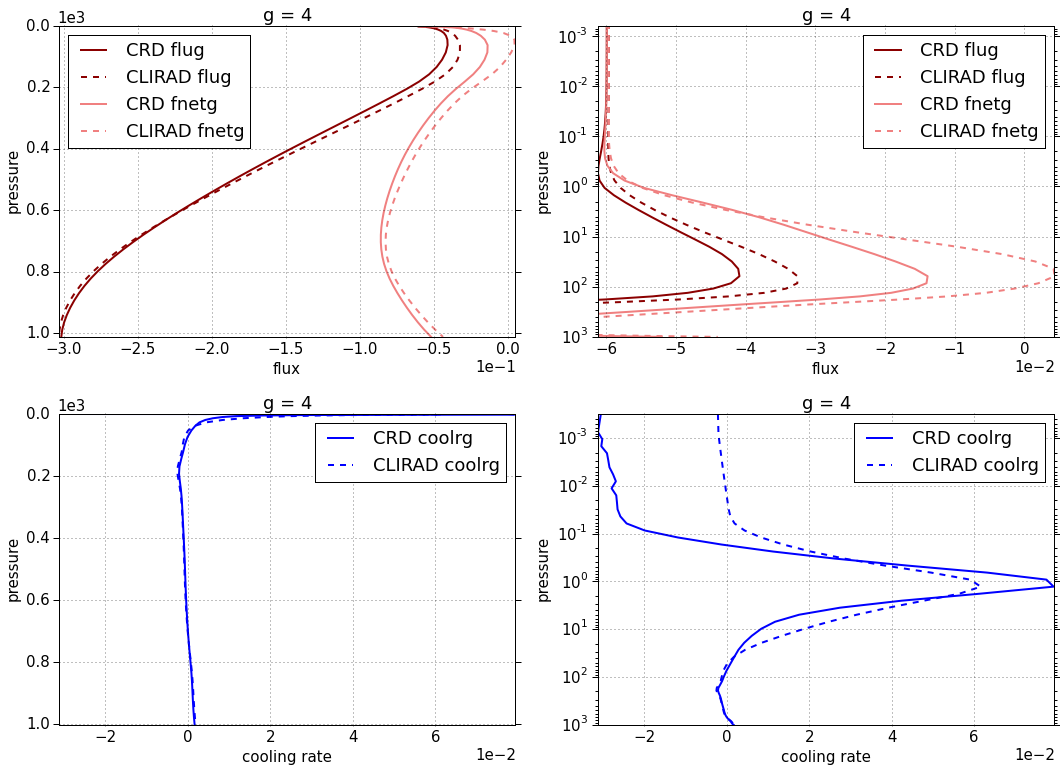

In [530]:
matplotlib.rcParams.update({'font.size': 15,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 


for g in [1, 2, 3, 4]:
    
    print()
    print(5 * '-' + '  g-group {}  '.format(g) + 15 * '-')
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
    axs = axs.flatten()

    for ax, (vartype, yscale) in zip(axs, names_ax):
        for name_var in dict_names_allowedvar[vartype]:
            for model in names_model:
                ds = dict_ds[(vartype, model)]
                ds[name_var].sel(g=g)\
                .climaviz\
                .plot(ax=ax, 
                      linewidth=2, grid=True,
                      label=model.upper() + ' ' + name_var,
                      color=dict_color[name_var],
                      linestyle=dict_linestyle[model],
                      index_on_yaxis=True, 
                      yincrease=False, yscale=yscale,
                      varlim_from_indexrange=dict_varlim[yscale])
            
                ax.set_xlabel(vartype)
            
    plt.tight_layout()
    display.display(plt.gcf())
    plt.close()

In [12]:
# things we can plot

varnames = ['flug', 'fldg', 'fnetg', 'coolrg'] # variables
gs = [1, 2, 3, 4]     # g-group

models = [{'name': 'crd',
           'fluxg': ds_fluxg,
           'coolrg': ds_coolrg,
           'colour': 'b', 
           'linestyle': '-'},
          {'name': 'clirad',
           'fluxg': ds_fluxg_clirad, 
           'coolrg': ds_coolrg_clirad, 
           'colour': 'b', 
           'linestyle': '--'}]

subplots = [{'yscale': 'linear', 
             'varlim_from_indexrange': (10, 1020)},
            {'yscale': 'log',
             'varlim_from_indexrange': (0, 10)}]

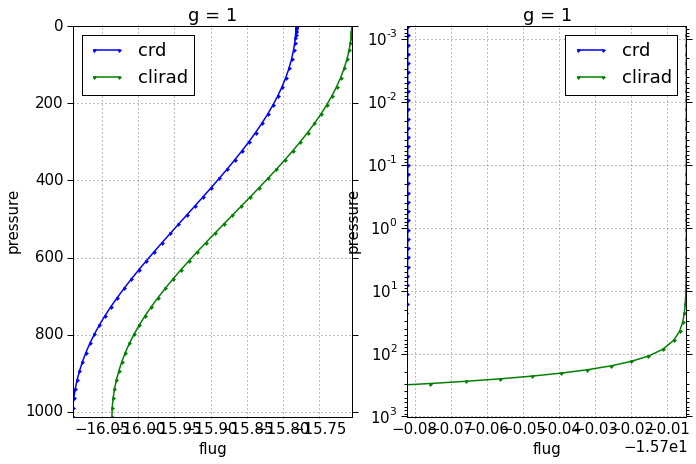

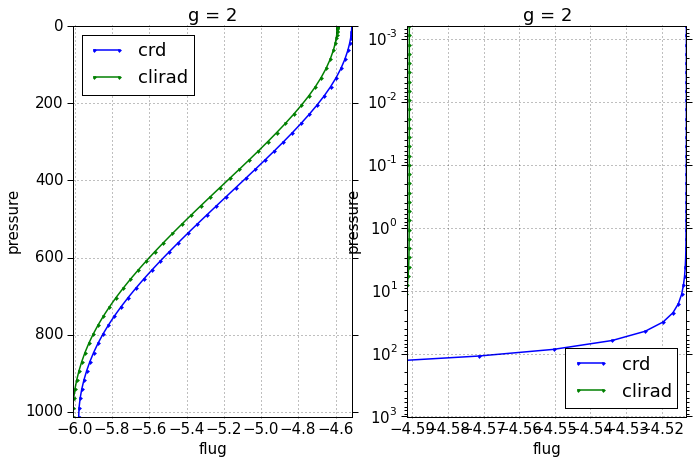

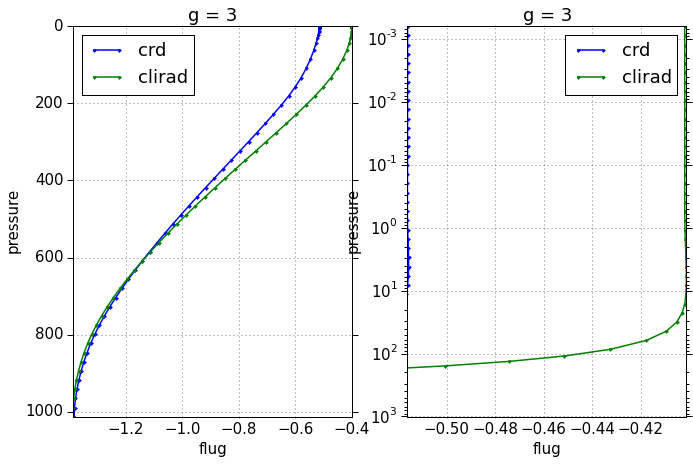

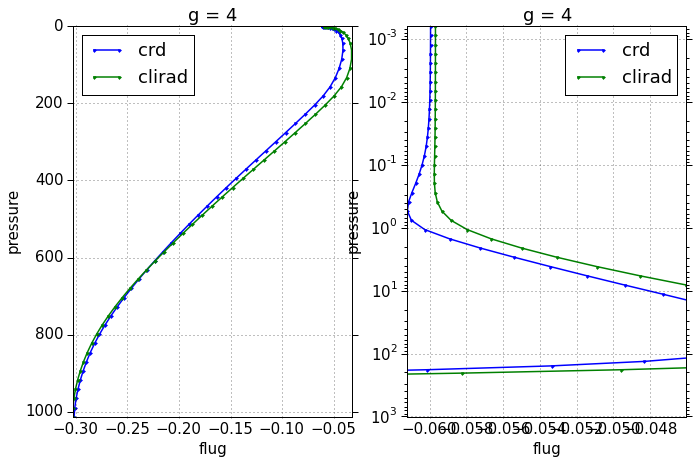

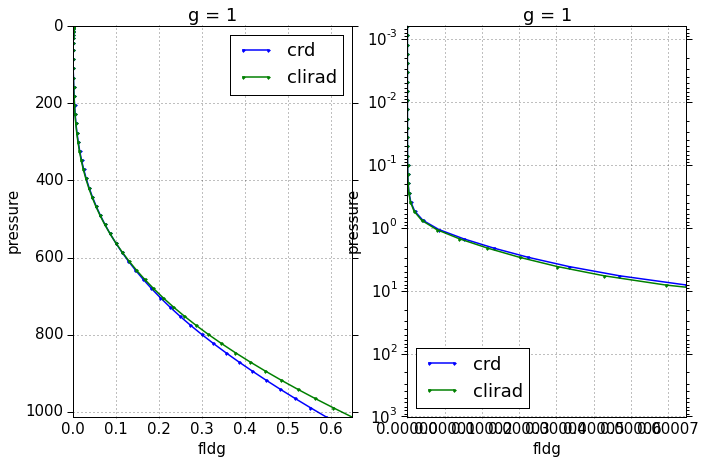

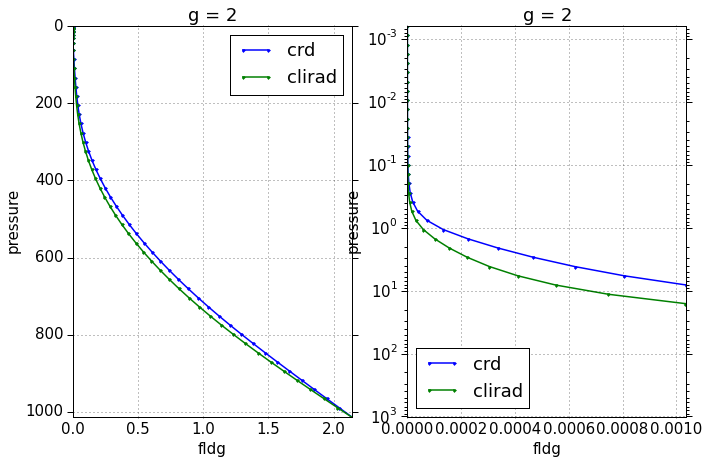

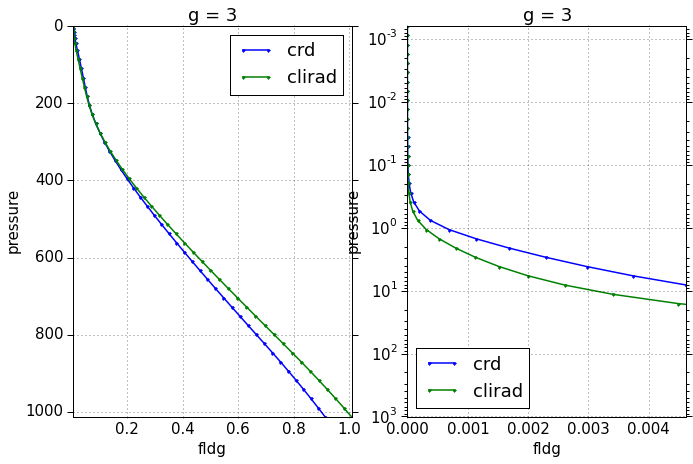

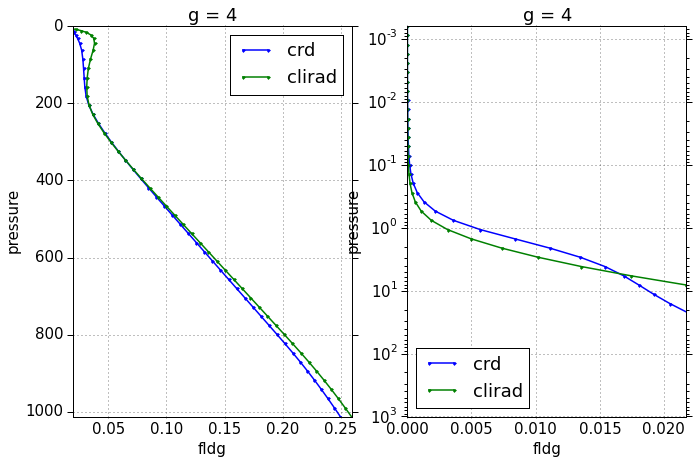

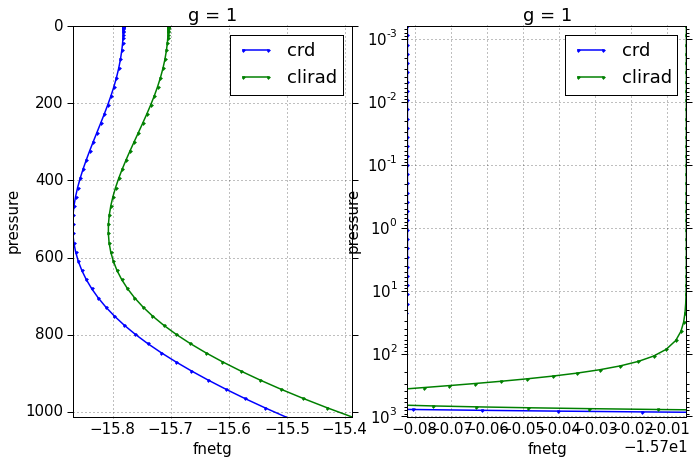

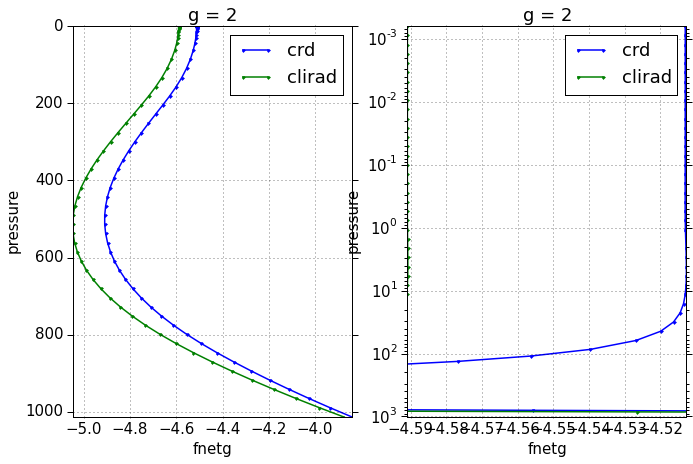

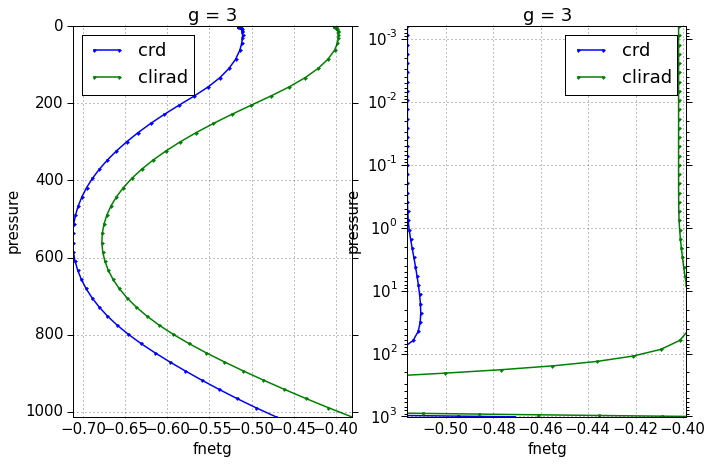

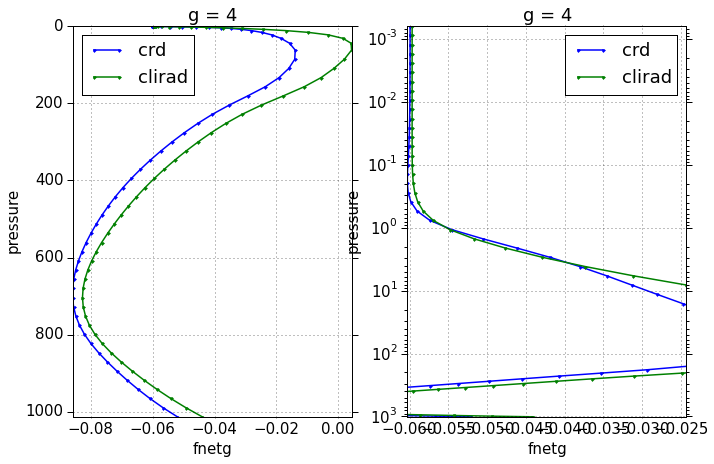

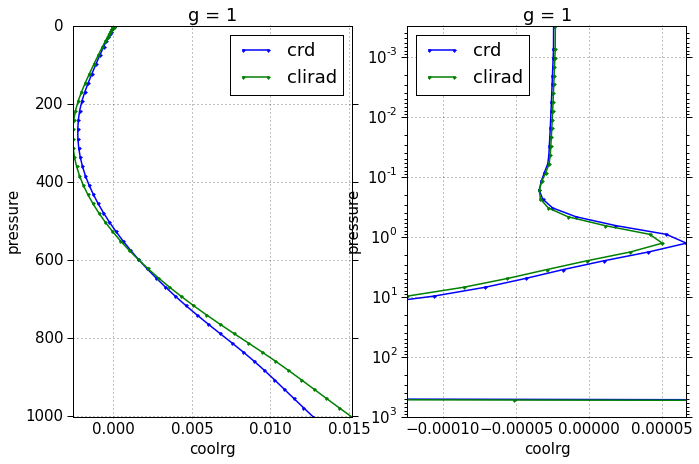

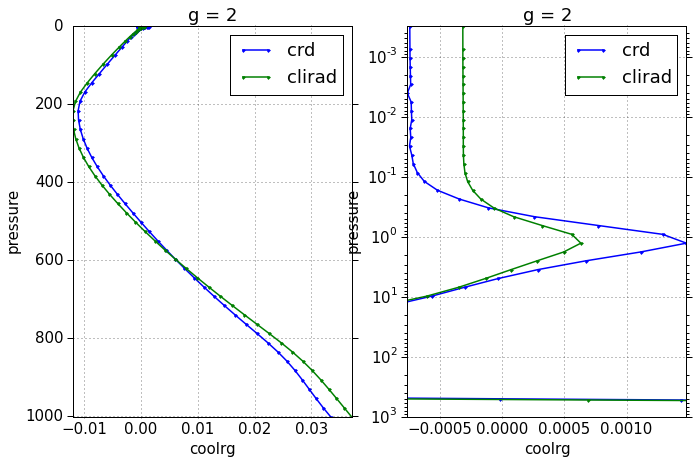

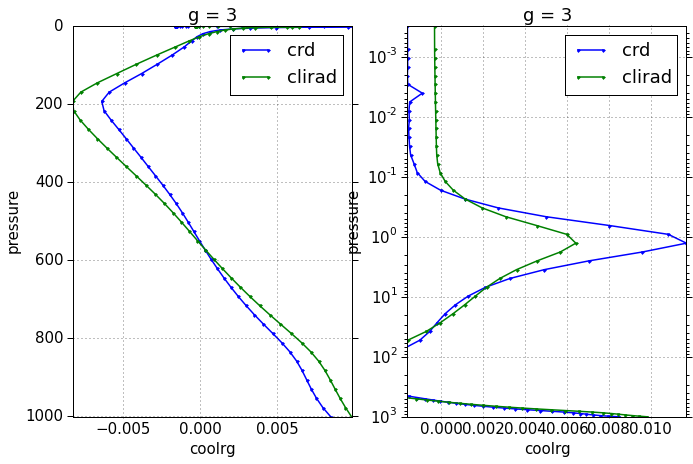

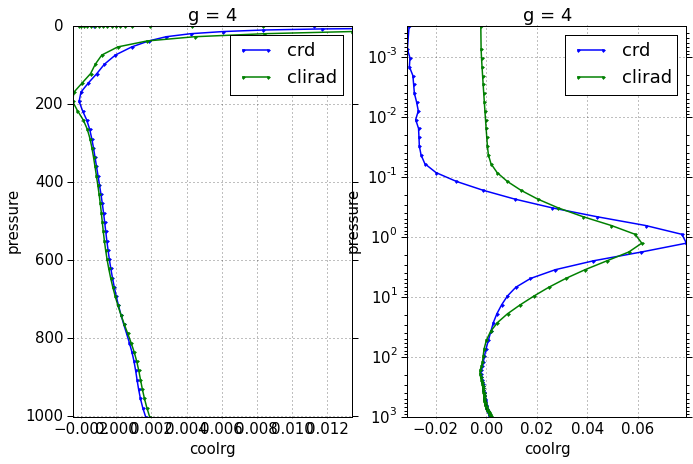

In [490]:
for varname in varnames:
    dsname = 'coolrg' if varname == 'coolrg' else 'fluxg'
    
    for g in gs:
        
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 7))
        for ax, subplot in zip(axs, subplots):
            for model in models:
                model[dsname][varname].sel(g=g)\
                .climaviz.plot(ax=ax, 
                               index_on_yaxis=True,
                               yincrease=False,
                               linewidth=1.5,
                               marker='.',
                               grid=True,
                               label=model['name'],
                               **subplot)
            ax.legend(loc='best')
            
        display.display(plt.gcf())
        plt.close()